# Интернет-магазин «Стримчик»: выявление определяющие успешность игры закономерности

Цели и задачи: 

- Нужно выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Ход работы: 
- Шаг 1 - загрузка данных(открыть файл с данными и изучить общую информацию)
- Шаг 2 - предобработка данных(заменить названия столбцов, преобразовать данные в нужные типы, обработать пропуски, посчитайть суммарные продажи во всех регионах)
- Шаг 3 - выполнить исследовательский анализ данных
- Шаг 4 - создать портрет пользователя каждого региона
- Шаг 5 - выполнить проверку гипотезы
- Шаг 6 - написать общий вывод

Описание данных:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import binom, poisson
import seaborn as sns

### Шаг 1. Загрузка данных

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6

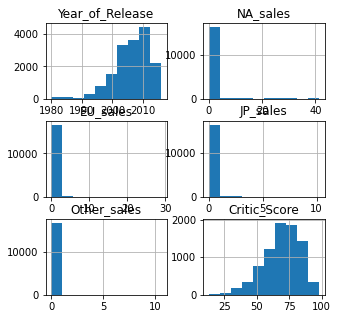

In [2]:
data = pd.read_csv('/datasets/games.csv')
display(data)
print(data.info())
data.hist(figsize=(5,5))
print(data.isnull().sum())

Выод к первому шагу:
- данные выгружены и невооруженным глазом видно, что с данными проблемы: есть некторое количество пропусков(Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating), название столбцов не приведены к нижнему регистру(почти все), типы данных не везде соответсвуют параметрам(User_Score и Year_of_Release) >>> будем все исправлять

### Шаг 2 . Предобработка данных

#### Заменим названия столбцов

In [3]:
data.columns = data.columns.str.lower()
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


####  Преобразуем данные в нужные типы

Смутило, что у всех рейтингов тип float, а у user_score - нет, проверям >>> 

In [4]:
print(data['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


Нашли 'tbd', 'tbd' - это To Be Determined, TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.(источник - https://mobilradio.ru/information/vocabulary/tbd.htm)

In [5]:
# непонятно, почему данные не определены или по ним решение еще не принятно, нужно посмотреть строки, где есть tbd
display(data[data['user_score'] == 'tbd'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Получилось, что в столце using_score 2424 значений tbd, это немало. Могу предположить, что из за маленького количества продаж, информации о этих играх мало, поэтому используется 'To Be Decided'
поэтому просто предлагаю пока заменить tbd на NaN и преобразовать в тип float, а потом дальше посмотреть как поступить с пропусками

In [6]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)
data['user_score'] = data['user_score'].astype(float)
# print(data.info())

#### Обработаем пропуски

In [7]:
print(data.isnull().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


In [8]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

Теперь разберемся с critic_score(8578), user_score(9125), rating(6766). Медианой средним или модой заменять эти значения нецелесообразно, так как каждую игру оценивают независимо. Пропуски могли появиться из за того, что рейтинг и/или оценки пока что не успели сформироваться или наоборот игра вышла до того как появились рейтинги и/или критерии оценивания и эти игры просто напросто не кому было оценивать. Выборок с пропущенными значениями довально много, удалить нельзя(исказяться данные), нужно как то их отметить чтобы при анализе было видно, что у данных игр НЕТ РЕЙТИНГА или/и ОЦЕНОК. Отметим пропущенные оценки несуществующим для данной выборки значения, а отсутствующий рейтинг отметим no_rating.

In [9]:
# максмум 100
# data['critic_score'] = data['critic_score'].fillna(-1)
# максимум 10
# data['user_score'] = data['user_score'].fillna(-1)
data['rating'] = data['rating'].fillna('no_rating')
print(data.isnull().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating                0
dtype: int64


#### Посчитаем суммарные продажи во всех регионах 

In [10]:
data['total_sale'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,no_rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,no_rating,0.01


Вывод к шагу 2:
- приведены название столбцов к нижнему регистру
- столбцы year_of_release и user_score преобразованы в подходящие типы(Int64 и float соответственно).
- сократили количество пропусков(rating 6766 --> 0)
- Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.

### Шаг 3. Исследовательский анализ данных

#### Посмотрим, сколько игр выпускалось в разные годы

count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64


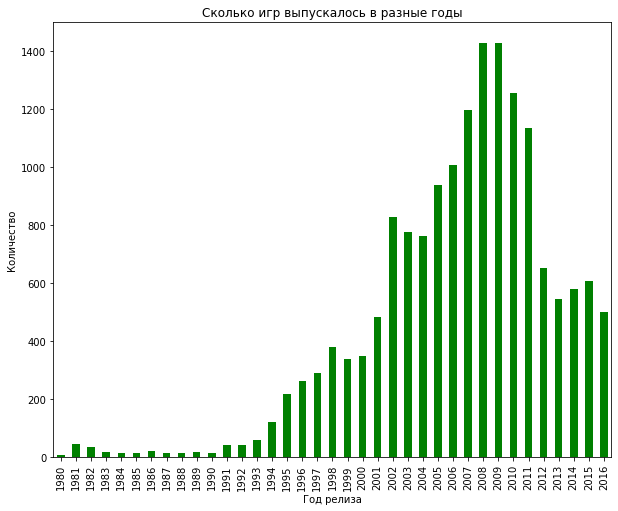

In [11]:
year_group = data.groupby('year_of_release')['name'].count()
year_group.plot(kind='bar', figsize=(10, 8), color='green', xlabel='Год релиза', ylabel='Количество')
plt.title('Сколько игр выпускалось в разные годы')
print(data['year_of_release'].describe())

По графику видно, что больше всего игр было выпущено в 2008-2009 годах. После них идет некоторый спад. Я думаю, скорее всего он обусловлен как раз таки появившимся в 2008-2009 годах разнообразием игр, публика стала более требовательной к качеству игрушек и их разработка стала более трудоемким и долгим процессом. Также видно постепенное нарастание рынка видеоигр с 1990 года. Я считаю, что данные за все периоды важны, по ним можно увидеть динамику развития данный сферы. НО не забываем нашу главную задачу: 'Нужно выявить определяющие успешность игры закономерности', а для этого данных с 1980 по 1997 недостаточно, в силу мощностей старой техники игр выпускалось очень мало и поэтому данный за этот период НЕ ВАЖНЫ.

#### Посмотрим, как менялись продажи по платформам

In [12]:
# Выберем платформы с наибольшими суммарными продажами
platform_group = data.groupby('platform')['total_sale'].sum()
# применю reset_index() для того чтобы преобразовать тип grouby в dataframe
platform_group = platform_group.reset_index()
# дам название стобцам
platform_group.columns = ['platform', 'platform_total_sale']
# выведу на экран 
print(platform_group.sort_values(by='platform_total_sale', ascending=False).reset_index(drop=True))

   platform  platform_total_sale
0       PS2              1255.77
1      X360               971.42
2       PS3               939.65
3       Wii               907.51
4        DS               806.12
5        PS               730.86
6       GBA               317.85
7       PS4               314.14
8       PSP               294.05
9        PC               259.52
10      3DS               259.00
11       XB               257.74
12       GB               255.46
13      NES               251.05
14      N64               218.68
15     SNES               200.04
16       GC               198.93
17     XOne               159.32
18     2600                96.98
19     WiiU                82.19
20      PSV                54.07
21      SAT                33.59
22      GEN                30.77
23       DC                15.95
24      SCD                 1.86
25       NG                 1.44
26       WS                 1.42
27     TG16                 0.16
28      3DO                 0.10
29       G

Итак, платформами с наибольшими суммарными продажами будем считать первые 11. Далее, построим распределение по годам.

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

Нужно всегда стараться писать более универсальный код, без ручного внесения данных. Если данные дополнятся или изменятся, то список платформ нам придется переписывать, при этом можно допустить ошибки. Лучше сразу формировать список платформ из полученной группировки по продажам и его потом использовать при фильтрации. Ниже написал пример. </div>

In [13]:
# код ревьюера
data.groupby('platform').agg({'total_sale': 'sum'}).sort_values(by='total_sale', ascending=False).head(11).index.to_list()

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC', '3DS']

In [14]:
platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC', '3DS']
filtered_data = data[data['platform'].isin(platforms)].reset_index(drop=True)
display(filtered_data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
13334,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,NaN,NaN,no_rating,0.01
13335,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,no_rating,0.00
13336,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
13337,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,no_rating,0.01


Построим для каждой платформы распределение по годам

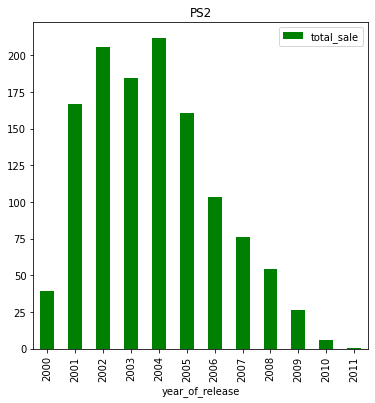

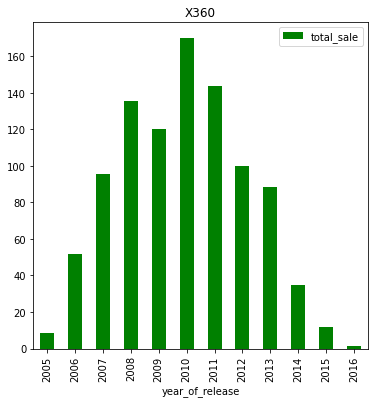

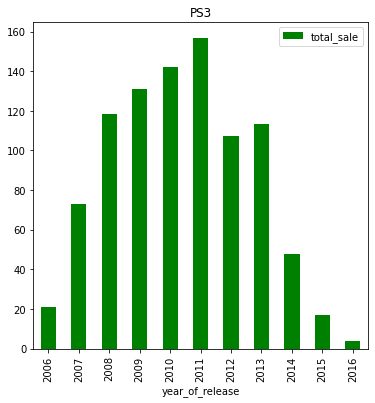

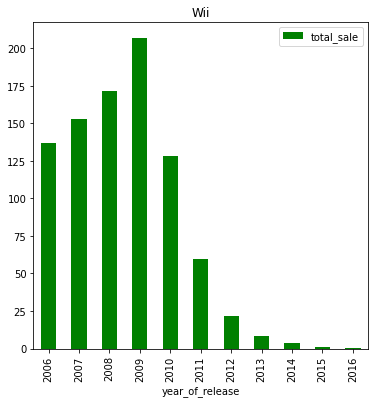

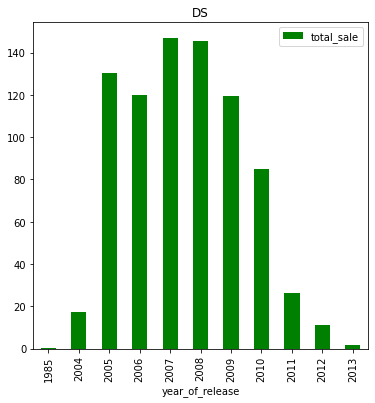

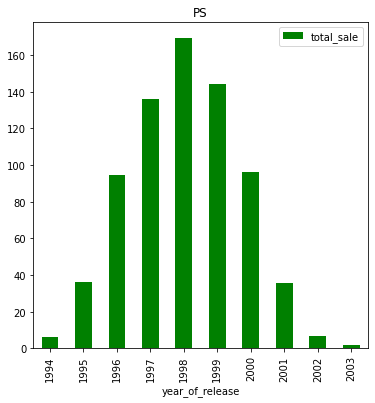

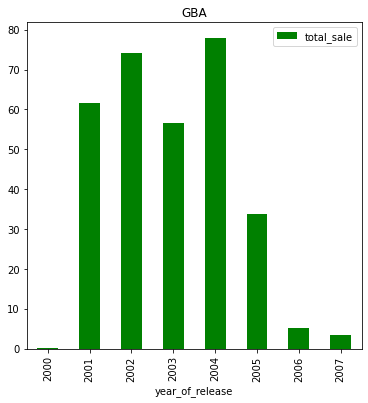

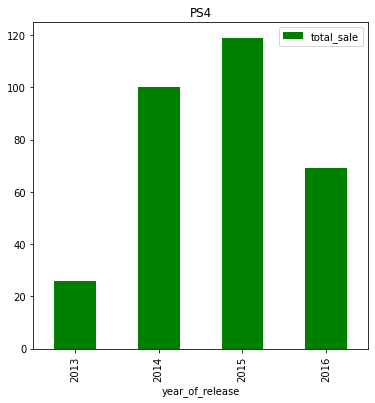

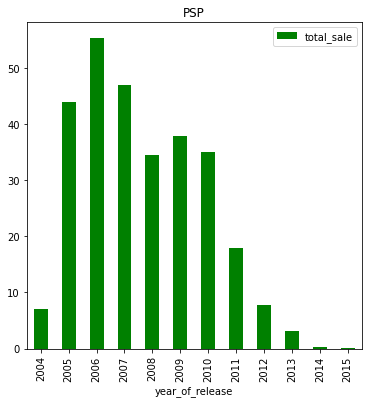

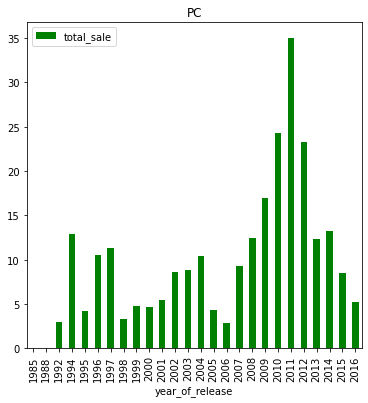

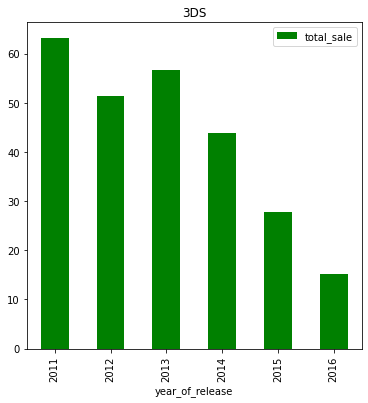

In [15]:
for platform in platforms:
    filtered_data[filtered_data['platform'] == platform].pivot_table(index='year_of_release', values='total_sale', aggfunc='sum').plot( kind='bar', figsize=(6, 6), color='green')
    plt.title(platform)

Исходя из полученных нами распределений, можно дать ответ на вопрос; - 'За какой характерный срок появляются новые и исчезают старые платформы?'. Самая живучая на момент 2016 платформа оказалась 'PC'. 
- 'PS2' - просуществовала 12 лет(2000-2011),из них особой популярностью пользовалась с 2002 по 2004 год(3 года), cтала терять популярность с 2006 года, то есть она почти полностью исчезла с площадок за 7 лет. 
- 'X360' - (2005-2016), набрала популярность на рынке примерно за 3-4 года, стала сдавать позиции с 2011 года и за 6 лет почти исчезла с площадок
- 'PS3' - 2011 год пик популярности, появилась в 2015 году и набрала популярность за 2 года, за 5 лет потеряла ее
- 'Wii' - 2006 - 2009 год набор популярности, 2010 - 2016 ее исчезновение с рынка(7лет)
- 'DS' - за 4 года поднялся спрос, за 6 лет его утратила 
- 'PS' - четкий пик популярности в 1998 году, 4 года на подьем и 5 лет на падения почти до нуля по популярности 
- 'GBA' - за один год поднялся спрос, за 3 года платформа начала исчезать с площадок
- 'PS4' - набарала популярность за год, в 2016 только начала убывать 
- 'PSP' - 2 года на набор популярности и в течении 9 лет ее потеря
- 'PC' - рост популярности за 1 год  до 2011 года, после спад в течении 5 лет
- '3DS' - 1 год на появление на рынке и 5 лет на упадок популярности 

Ответим на вопрос, характерное время за которое появляется платформа - 2-4 года. А исчезют они с рынка обычно в течении 5-9 лет.

In [16]:
# код ревьюера
data.groupby('platform')['year_of_release'].nunique().mean()

7.67741935483871

#### Возьмем данные за соответствующий актуальный период

За актуальный период возьмем 3 года. То есть будем рассматривать данные с 2014 года.

#### Не учитываем в работе данные за предыдущие годы

In [17]:
actual_data = data[data['year_of_release'] >= 2014]
actual_data = actual_data.reset_index(drop=True)
display(actual_data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no_rating,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_rating,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
1684,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
1685,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
1686,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
1687,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01


####  Выберим несколько потенциально прибыльных платформ.

In [18]:
top_platforms = ['PS4', 'PC', 'XOne']
data_top_platforms = actual_data[actual_data['platform'].isin(top_platforms)].reset_index(drop=True)
display(data_top_platforms)https://k8s.jupyterhub.praktikum-services.ru/user/user-0-1891705885/notebooks/48a04d31-755b-4ca1-a953-1a9bd1b3169e.ipynb#%D0%92%D1%8B%D0%B1%D0%B5%D1%80%D0%B8%D0%BC-%D0%BD%D0%B5%D1%81%D0%BA%D0%BE%D0%BB%D1%8C%D0%BA%D0%BE-%D0%BF%D0%BE%D1%82%D0%B5%D0%BD%D1%86%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE-%D0%BF%D1%80%D0%B8%D0%B1%D1%8B%D0%BB%D1%8C%D0%BD%D1%8B%D1%85-%D0%BF%D0%BB%D0%B0%D1%82%D1%84%D0%BE%D1%80%D0%BC.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
3,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_rating,7.98
4,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
750,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01
751,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,NaN,NaN,no_rating,0.01
752,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,no_rating,0.01
753,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01


Мой топ 3, исходя из построенных в шаге 3.2 графиков: 
1) PS4
2) PC
3) XOne
- Логика такая, лидируют по продажам  PS2(1255.77), X360(971.42), PS3(939.65), но эти платформы утратили свою популярность(они стремительно падают или уже упали) и их дальнейшее продвижение в магазине может принести убытки. Поэтому исходя из графиков будет разумно считать PS4, PC и XOne - потенциально прибыльными платформами, так как PS4 относительно недавно вышла в релиз и ее спад не такой интенсивный как у других платформ,также все ее предшественники пользовались большой популярностью, PC - всегда будет пользоваться популярностью и его спад опять же не такой инетенсивный как у других, XOne - вышла недавно, ее предшественник пользовался популярностью.

#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

Text(0, 0.5, 'Продажи')

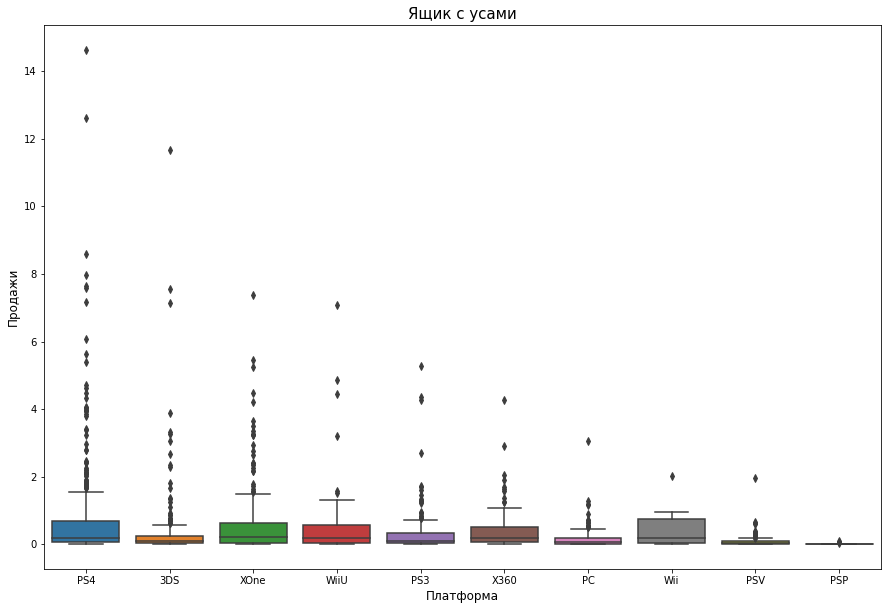

In [19]:
plt.figure(figsize=(15,10))
sns.boxplot(data = actual_data, x='platform', y='total_sale')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи',fontsize=12)

Много выбросов, избавимся от них

Text(0, 0.5, 'Продажи')

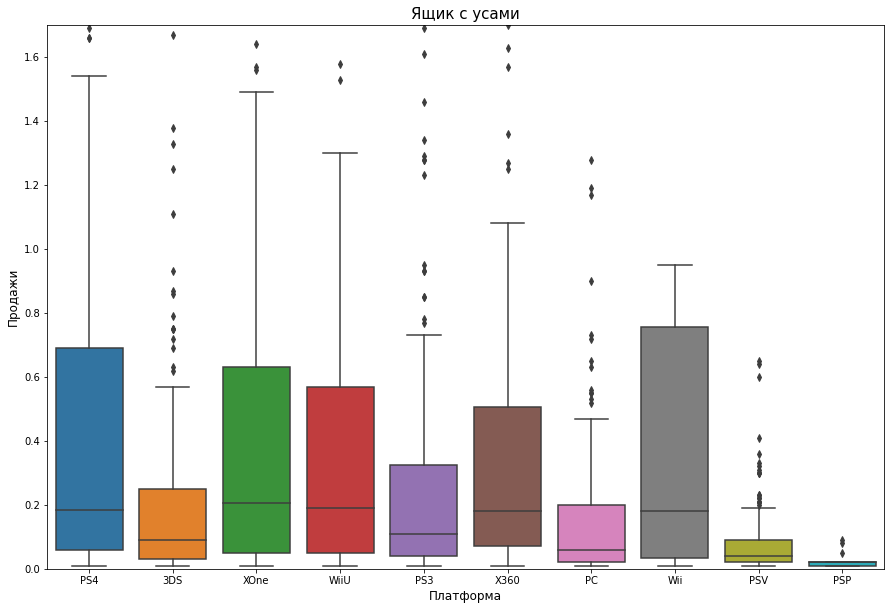

In [20]:
# заново нарисуем ящик с усами
plt.figure(figsize=(15,10))
sns.boxplot(data = actual_data, x='platform', y='total_sale')
plt.ylim(0, 1.7)
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи',fontsize=12)

Итак, лидерами продаж становяться Wii, PS4 и XOne. Самой непопулярной платформой за актуальный период становиться PSP

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

Выберу платформу котрая входит в топ 3 платформ и в топ лидеров продаж, а также которая находится на рынке большое количество времени, так как по таким данным будет очень удобно проводить анализ. Это платформа - 'PC'

In [21]:
pc_platform = actual_data[actual_data['platform'] == 'PC'].reset_index(drop=True)
display(pc_platform)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05
1,Fallout 4,PC,2015,Role-Playing,0.51,0.67,0.0,0.10,84.0,5.4,M,1.28
2,Farming Simulator 2015,PC,2014,Simulation,0.08,1.04,0.0,0.07,NaN,NaN,no_rating,1.19
3,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.0,0.09,96.0,7.9,M,1.17
4,The Elder Scrolls Online,PC,2014,Role-Playing,0.32,0.51,0.0,0.07,71.0,5.7,M,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...
146,Ride 2,PC,2016,Racing,0.00,0.01,0.0,0.00,78.0,7.9,E,0.01
147,Rugby World Cup 2015,PC,2015,Sports,0.00,0.01,0.0,0.00,NaN,1.4,E,0.01
148,Codename: Panzers Complete Collection,PC,2016,Strategy,0.00,0.01,0.0,0.00,NaN,NaN,no_rating,0.01
149,The Amazing Spider-Man 2 (2014),PC,2014,Action,0.00,0.01,0.0,0.00,NaN,NaN,no_rating,0.01


Построим сначала для 'critic_score'

(30.0, 100.0)

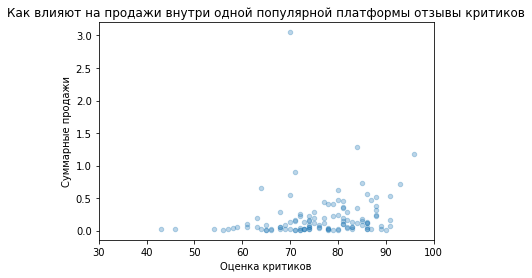

In [22]:
# во первых отфильтруем наш датафрэйм 
# pc_platform = pc_platform[pc_platform['critic_score'] <= 100]

# так как у мы проверяем зависимость 'total_sale' от 'critic_score', то тогда 'total_sale' - это 'y', а 'critic_score' - это 'x'
pc_platform.plot(x='critic_score', y='total_sale', kind='scatter', alpha=0.3) 
plt.title('Как влияют на продажи внутри одной популярной платформы отзывы критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные продажи')
plt.xlim(30, 100)

Теперь для 'user_score'

(1.0, 10.0)

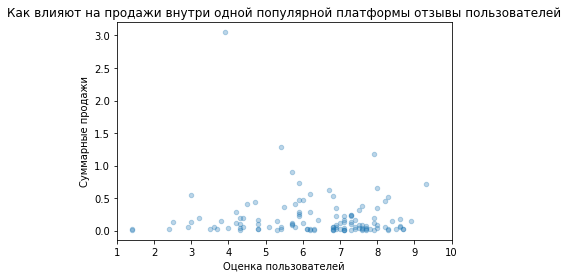

In [23]:
# pc_platform = pc_platform[pc_platform['user_score'] <= 10]
pc_platform.plot(x='user_score', y='total_sale', kind='scatter', alpha=0.3) 
plt.title('Как влияют на продажи внутри одной популярной платформы отзывы пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Суммарные продажи')
plt.xlim(1, 10)

In [24]:
# код ревьюера

print(data[(data['platform'] == 'PC') & (data['critic_score'] <= 100)].shape[0])
print(data[(data['platform'] == 'PC') & (data['user_score'] <= 10)].shape[0])
print(data[(data['platform'] == 'PC') & (data['critic_score'] <= 100) & (data['user_score'] <= 10)].shape[0])

715
770
703


Теперь построим матрицу корреляции

In [25]:
print('Корреляция между продажами и оценкой критиков: ', pc_platform['total_sale'].corr(pc_platform['critic_score']))
print('Корреляция между продажами и оценкой пользователей: ', pc_platform['total_sale'].corr(pc_platform['user_score']))

Корреляция между продажами и оценкой критиков:  0.17463413769350036
Корреляция между продажами и оценкой пользователей:  -0.07159665703472452


Вывод для PC, отсутствует корреляция между оценкой критиков и продажами, что означает что оценка критиков игры не влиет на ее спрос. Кореляции между оценкой пользователей и продажами не наблюдается, следует данные велечины не связаны. 


Корреляция между продажами и оценкой критиков для PS4:  0.40266141068104083
Корреляция между продажами и оценкой критиков для WiiU:  0.370201412480884
Корреляция между продажами и оценкой критиков для XOne:  0.42867694370333226


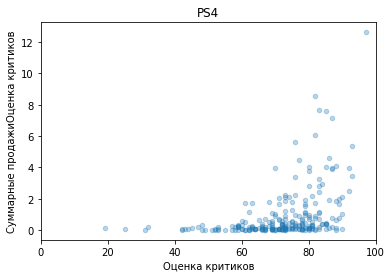

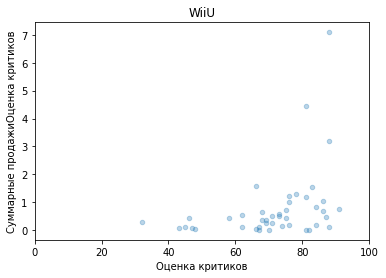

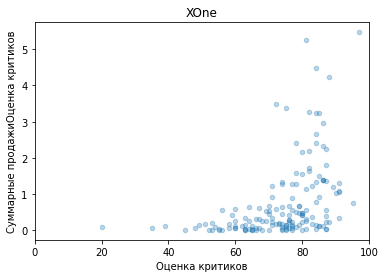

In [26]:
chosen_platforms = ['PS4', 'WiiU', 'XOne']

for chosen_platform in chosen_platforms:
    set_platform = actual_data[actual_data['platform'] == chosen_platform].reset_index(drop=True)
    set_platform.plot(x='critic_score', y='total_sale', kind='scatter', alpha=0.3) 
    plt.title(chosen_platform)
    plt.xlabel('Оценка критиков')
    plt.ylabel('Суммарные продажи')
    plt.xlim(0, 100)
    print(f'Корреляция между продажами и оценкой критиков для {chosen_platform}: ', set_platform['total_sale'].corr(set_platform['critic_score']))
    

Для всех 3 платформ прослеживается средняя корреляция, это значит, что оценки критиков все таки влияют на спрос игры и на них стоит обращать внимание 

Корреляция между продажами и оценкой пользователей для PS4:  -0.040131589472697356
Корреляция между продажами и оценкой пользователей для WiiU:  0.4079264579217078
Корреляция между продажами и оценкой пользователей для XOne:  -0.0703839280647581


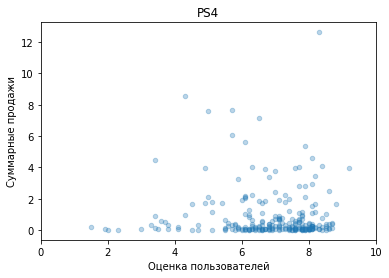

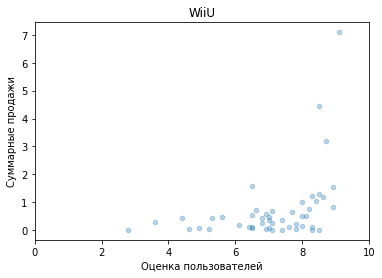

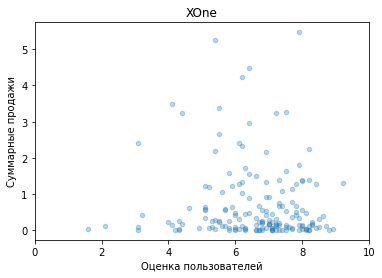

In [27]:
for chosen_platform in chosen_platforms:
    set_platform = actual_data[actual_data['platform'] == chosen_platform].reset_index(drop=True)
    set_platform.plot(x='user_score', y='total_sale', kind='scatter', alpha=0.3) 
    plt.title(chosen_platform)
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Суммарные продажи')
    plt.xlim(0, 10)
    print(f'Корреляция между продажами и оценкой пользователей для {chosen_platform}: ', set_platform['total_sale'].corr(set_platform['user_score']))
    

Есть средняя корреляция между оценкой пользователей и продажами у платформы WiiU, соответственно спрос на игры на этой платформе  будет зависеть от оценки других пользоватлей. 
У платформ XOne и PS4 корреляция отсутствует, следовательно никакого влияния нет.

Общий вывод для всех платформ: Оценки пользователей никак не часто, но могут влиять на продажи игры, а оценки критиков оказывают  влияние на спрос игр в большинстве случаев. Поэтому все таки стоит обращать внимание на данные критерии при нахождении потенциально популярного продукта.

#### Посмотрим на общее распределение игр по жанрам

Теперь посмотрим по популярность жанра по суммарным продажам >>> 

count    12.000000
mean      0.131250
std       0.127585
min       0.030000
25%       0.082500
50%       0.095000
75%       0.128750
max       0.515000
Name: total_sale, dtype: float64


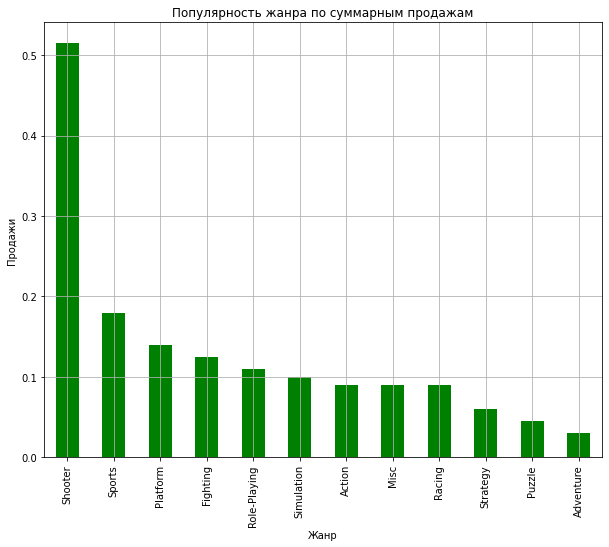

In [28]:
genre_sale = actual_data.groupby('genre')['total_sale'].median()
genre_sale.sort_values(ascending = False).plot(kind='bar', figsize=(10, 8), color='green', xlabel='Жанр', ylabel='Продажи', grid='on')
plt.title('Популярность жанра по суммарным продажам')
print(genre_sale.describe())

В ТОПЕ - 3 самых прибыльных жанров оказываются 'Shooter', 'Sports', 'Platform'. Самые низкие продажи у 'Puzzle', 'Adventure'

Вывод к шагу 3:
- Период за который выпускалось большее количество игр 2008 - 2009 года. Определили что данные за 1980 по 1997 не важны для нашей конечной цели

- Определи ли топ-лидеров по продажам среди платформ 1 -'PS2', 2- 'X360', 3 -'PS3', 4 -'Wii', 5 - 'DS', 6- 'PS', 7 -'GBA', 8 -'PS4', 9 - 'PSP', 10 - 'PC'

- Определили за какой характерный срок появляются и исчезают платформы. Характерное время за которое появляется платформа - 2-4 года. А исчезют они с рынка обычно в течении 5-9 лет

- Для дальнейшего анализа за актуальный период взяли 3 года. То есть далее будут рассматриваться данные с 2014 года.

-  Лидируют по продажам PS2(1255.77), X360(971.42), PS3(939.65), но их динамика стремительно падает, поэтому считаться потенциально популярными платформами будут  PS4, PC и XOne.

- Итак, самой непопулярной платформой за актуальный период становиться PSP', а лидерами продаж становяться Wii, PS4 и XOne. Следовательно, при составлении портрета потенциально популярного продука это нужно учесть и сделать вывод, что потенциально популярный продукт должен иметь возморжность быть размещен на данных платформах.

- Сделали вывод, что оценки пользователей никак не влияют на продажи игры, а оценки критиков оказывают минимальное влияние. Поэтому не стоит обращать особое внимание на данные критерии при нахождении потенциально популярного продукта.

- В ТОПЕ - 3 самых прибыльных жанров оказываются 'Shooter', 'Sports', 'Platform'. Самые низкие продажи у 'Puzzle', 'Adventure'


###  Шаг 4. Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):

#### Самые популярные платформы (топ-5)

,platform,na_sales,"share, %"
0,PS4,98.61,34.714497
1,XOne,81.27,28.610153
2,Others,31.19,10.980075
3,X360,28.30,9.962684
4,3DS,22.64,7.970147
5,PS3,22.05,7.762445


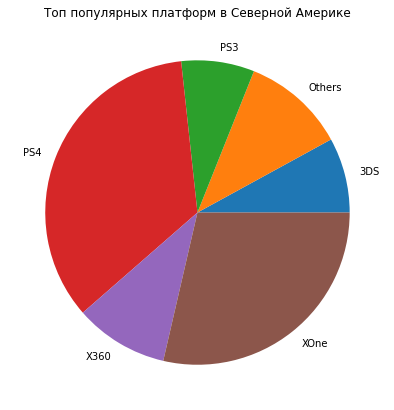

In [29]:
data_na = actual_data.groupby('platform')['na_sales'].sum()
data_na = data_na.reset_index()
data_na = data_na.sort_values(by='na_sales', ascending=False).reset_index(drop=True)
data_na.loc[data_na['na_sales'] < 22 , 'platform'] = 'Others'

# посчитаем сразу долю
na_sum = data_na['na_sales'].sum()
data_na['share, %'] = data_na['na_sales']/na_sum*100
#l,;.'display(data_na)

# объеденю не попавшие в топ 5 платформы в ДРУГИЕ
data_na = data_na.groupby("platform").agg({"na_sales":"sum","share, %":"sum"}).reset_index()
data_na = data_na.sort_values(by='na_sales', ascending = False).reset_index(drop=True)

# создам диаграмму 
data_na.groupby(['platform']).sum().plot(kind='pie', y="na_sales", legend=None, figsize=(7, 7))

###-----------------------------------------------------------------------------------------------------------------------------
plt.title('Топ популярных платформ в Северной Америке')
plt.gca().set_axis_off()
###-----------------------------------------------------------------------------------------------------------------------------

display(data_na)

,platform,eu_sales,"share, %"
0,PS4,130.04,48.041968
1,XOne,46.25,17.086597
2,Others,34.76,12.841732
3,PS3,25.54,9.435496
4,PC,17.97,6.638836
5,3DS,16.12,5.955372


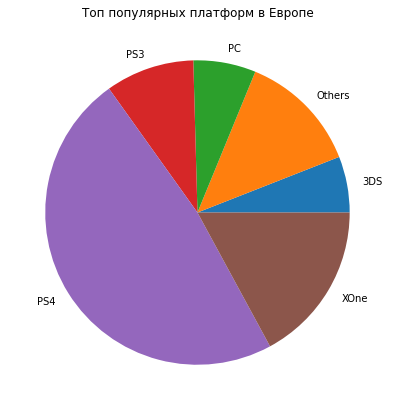

In [30]:
data_eu = actual_data.groupby('platform')['eu_sales'].sum()
data_eu = data_eu.reset_index()
data_eu = data_eu.sort_values(by='eu_sales', ascending=False).reset_index(drop=True)
data_eu.loc[data_eu['eu_sales'] < 16 , 'platform'] = 'Others'

# посчитаем сразу долю
eu_sum = data_eu['eu_sales'].sum()
data_eu['share, %'] = data_eu['eu_sales']/eu_sum*100
#display(data_eu)

# объеденю не попавшие в топ 5 платформы в ДРУГИЕ
data_eu = data_eu.groupby("platform").agg({"eu_sales":"sum","share, %":"sum"}).reset_index()
data_eu = data_eu.sort_values(by='eu_sales', ascending = False).reset_index(drop=True)

# создам диаграмму 
data_eu.groupby(['platform']).sum().plot(kind='pie', y="eu_sales",legend=None,  figsize=(7, 7))

###-----------------------------------------------------------------------------------------------------------------------------
plt.title('Топ популярных платформ в Европе')
plt.gca().set_axis_off()
###-----------------------------------------------------------------------------------------------------------------------------

display(data_eu)

,platform,jp_sales,"share, %"
0,3DS,44.24,47.523902
1,PS4,15.02,16.134923
2,PSV,14.54,15.619293
3,PS3,11.22,12.052852
4,WiiU,7.31,7.852616
5,Others,0.76,0.816414


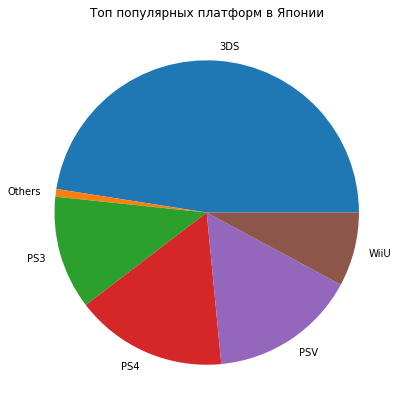

In [31]:
data_jp = actual_data.groupby('platform')['jp_sales'].sum()
data_jp = data_jp.reset_index()
data_jp = data_jp.sort_values(by='jp_sales', ascending=False).reset_index(drop=True)
data_jp.loc[data_jp['jp_sales'] <7 , 'platform'] = 'Others'

# посчитаем сразу долю
jp_sum = data_jp['jp_sales'].sum()
data_jp['share, %'] = data_jp['jp_sales']/jp_sum*100
# display(data_jp)

# объеденю не попавшие в топ 5 платформы в ДРУГИЕ
data_jp = data_jp.groupby("platform").agg({"jp_sales":"sum","share, %":"sum"}).reset_index()
data_jp = data_jp.sort_values(by='jp_sales', ascending = False).reset_index(drop=True)

# создам диаграмму 
data_jp.groupby(['platform']).sum().plot(kind='pie', y="jp_sales",legend=None, figsize=(7, 7))

###-----------------------------------------------------------------------------------------------------------------------------
plt.title('Топ популярных платформ в Японии')
plt.gca().set_axis_off()
###-----------------------------------------------------------------------------------------------------------------------------

display(data_jp)

Итак, топ - 5 популярных платформ для пользователя каждого региона(обращение к данным с 2006 года):

- Для NA 1)PS4 2)XOne 3)X360 4)3DS 5)PS3

- Для EU 1)PS4 2)XOne 3)PS3 4)PC 5)3DS

- Для JP 1)3DS 2)PS4 3)PSV 4)PS3 5)WiiU

Можно сказать, что PS4, PS3 и 3DS пользовались популярностью во всех регионах. XOne была популярной в европе и северной америке, а WiiU и PSV пользовались популярностью только в японии. И еще, в европейсокй части больше пользователей отдают предпочтения PC платформе, чем в других регионах.

#### Самые популярные жанры (топ-5)

           genre  na_sales   share, %
0        Shooter     79.02  27.818067
1         Action     72.53  25.533338
2         Sports     46.13  16.239527
3   Role-Playing     33.47  11.782722
4           Misc     15.05   5.298176
5       Fighting     12.43   4.375836
6         Racing      8.74   3.076815
7       Platform      6.79   2.390340
8      Adventure      5.64   1.985496
9     Simulation      2.63   0.925861
10      Strategy      0.98   0.344998
11        Puzzle      0.65   0.228825


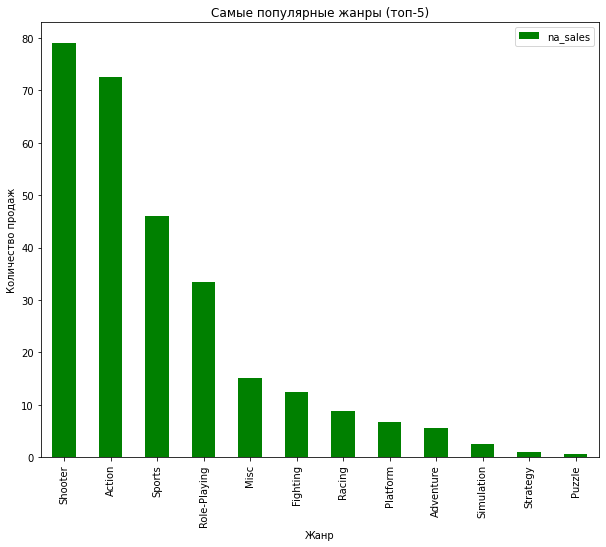

In [32]:
genre_na = actual_data.groupby('genre')['na_sales'].sum()
genre_na.sort_values(ascending = False).plot(kind='bar', figsize=(10, 8), color='green', xlabel='Жанр', ylabel='Количество продаж', legend='na_sales')
genre_na = genre_na.reset_index()
genre_na = genre_na.sort_values(by='na_sales', ascending=False).reset_index(drop=True)
plt.title('Самые популярные жанры (топ-5)')

# посчитаем сразу долю
na_sum = genre_na['na_sales'].sum()
genre_na['share, %'] = genre_na['na_sales']/na_sum*100
print(genre_na)

           genre  eu_sales   share, %
0         Action     74.68  27.589774
1        Shooter     65.52  24.205704
2         Sports     45.73  16.894488
3   Role-Playing     28.17  10.407123
4         Racing     14.13   5.220186
5           Misc     12.86   4.750997
6     Simulation      7.30   2.696911
7       Platform      6.80   2.512192
8       Fighting      6.69   2.471553
9      Adventure      6.49   2.397665
10      Strategy      1.79   0.661297
11        Puzzle      0.52   0.192109


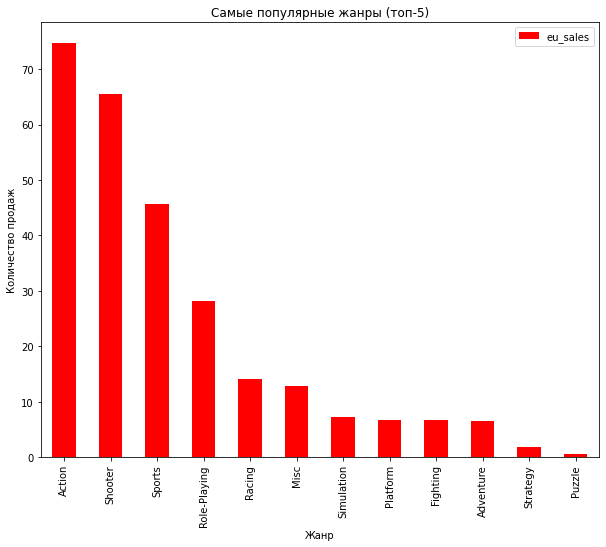

In [33]:
genre_eu = actual_data.groupby('genre')['eu_sales'].sum()
genre_eu.sort_values(ascending = False).plot(kind='bar', figsize=(10, 8), color='red', xlabel='Жанр', ylabel='Количество продаж', legend='eu_sales')
genre_eu = genre_eu.reset_index()
genre_eu = genre_eu.sort_values(by='eu_sales', ascending=False).reset_index(drop=True)
plt.title('Самые популярные жанры (топ-5)')

# посчитаем сразу долю
eu_sum = genre_eu['eu_sales'].sum()
genre_eu['share, %'] = genre_eu['eu_sales']/eu_sum*100
print(genre_eu)

           genre  jp_sales   share, %
0   Role-Playing     31.16  33.472983
1         Action     29.58  31.775701
2       Fighting      6.37   6.842840
3           Misc      5.61   6.026426
4        Shooter      4.87   5.231496
5      Adventure      3.60   3.867225
6         Sports      3.26   3.501987
7       Platform      2.69   2.889677
8     Simulation      2.31   2.481470
9         Racing      1.76   1.890643
10      Strategy      0.95   1.020518
11        Puzzle      0.93   0.999033


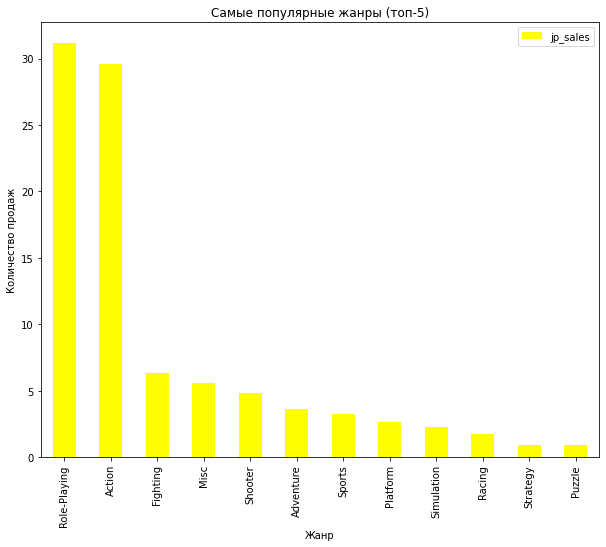

In [34]:
genre_jp = actual_data.groupby('genre')['jp_sales'].sum()
genre_jp.sort_values(ascending = False).plot(kind='bar', figsize=(10, 8), color='yellow', xlabel='Жанр', ylabel='Количество продаж', legend='jp_sales')
genre_jp = genre_jp.reset_index()
genre_jp = genre_jp.sort_values(by='jp_sales', ascending=False).reset_index(drop=True)
plt.title('Самые популярные жанры (топ-5)')

# посчитаем сразу долю
jp_sum = genre_jp['jp_sales'].sum()
genre_jp['share, %'] = genre_jp['jp_sales']/jp_sum*100
print(genre_jp)

Итак, топ - 5 популярных жанров для пользователей из каждого региона:

Для NA

1 -       Shooter
2 -        Action
3 -        Sports
4 -  Role-Playing
5 -          Misc

Для EU

1 -        Action
2 -       Shooter
3 -        Sports
4 -  Role-Playing
5 -        Racing

Для JP

1 -  Role-Playing
2 -        Action
3 -      Fighting
4 -          Misc
5 -       Shooter

Видим, что для пользователей из европы и северной америки первые 4 жанра в топе совпадают, это Shooter, Action, Sports, Role-Playing. Предпочтения пользователей из японии сильно отличаются, от na и eu, самым популярным там жанром стал Role-Playing, и еще в топ попал жанр Fighting.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

P.S столбцы с no_rating игнорируем

      rating  na_sales   share, %
0          M     96.42  33.943533
1  no_rating     64.72  22.783919
2          E     50.74  17.862423
3          T     38.95  13.711892
4       E10+     33.23  11.698233


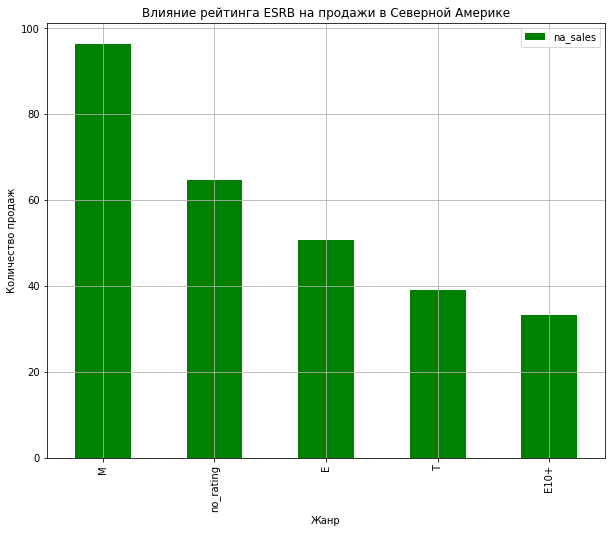

In [35]:
rating_na = actual_data.groupby('rating')['na_sales'].sum()
rating_na.sort_values(ascending = False).plot(kind='bar', figsize=(10, 8), color='green', xlabel='Жанр', ylabel='Количество продаж', legend='na_sales', grid='on')
plt.title('Влияние рейтинга ESRB на продажи в Северной Америке')
rating_na = rating_na.reset_index()
rating_na = rating_na.sort_values(by='na_sales', ascending=False).reset_index(drop=True)
# посчитаем сразу долю
na_sum = rating_na['na_sales'].sum()
rating_na['share, %'] = rating_na['na_sales']/na_sum*100
print(rating_na)

      rating  eu_sales   share, %
0          M     93.44  34.520467
1  no_rating     58.95  21.778484
2          E     58.06  21.449682
3          T     34.07  12.586818
4       E10+     26.16   9.664549


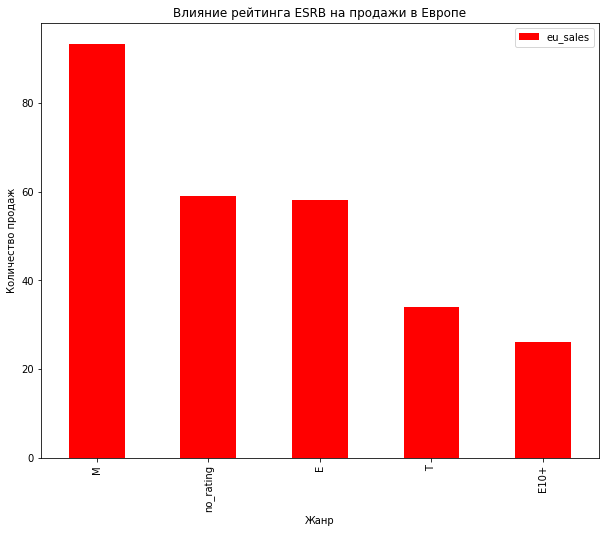

In [36]:
rating_eu = actual_data.groupby('rating')['eu_sales'].sum()
rating_eu.sort_values(ascending = False).plot(kind='bar', figsize=(10, 8), color='red', xlabel='Жанр', ylabel='Количество продаж', legend='eu_sales')
plt.title('Влияние рейтинга ESRB на продажи в Европе')
rating_eu = rating_eu.reset_index()
rating_eu = rating_eu.sort_values(by='eu_sales', ascending=False).reset_index(drop=True)
# посчитаем сразу долю
eu_sum = rating_eu['eu_sales'].sum()
rating_eu['share, %'] = rating_eu['eu_sales']/eu_sum*100
print(rating_eu)

           genre  jp_sales   share, %
0   Role-Playing     31.16  33.472983
1         Action     29.58  31.775701
2       Fighting      6.37   6.842840
3           Misc      5.61   6.026426
4        Shooter      4.87   5.231496
5      Adventure      3.60   3.867225
6         Sports      3.26   3.501987
7       Platform      2.69   2.889677
8     Simulation      2.31   2.481470
9         Racing      1.76   1.890643
10      Strategy      0.95   1.020518
11        Puzzle      0.93   0.999033


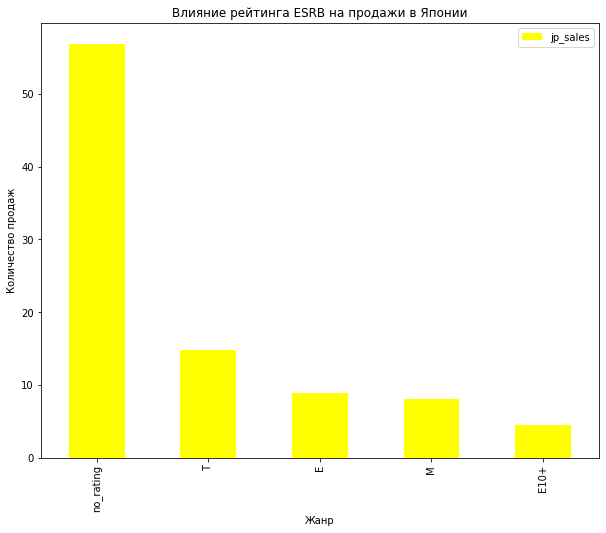

In [37]:
rating_jp = actual_data.groupby('rating')['jp_sales'].sum()
rating_jp.sort_values(ascending = False).plot(kind='bar', figsize=(10, 8), color='yellow', xlabel='Жанр', ylabel='Количество продаж', legend='jp_sales')
plt.title('Влияние рейтинга ESRB на продажи в Японии')
rating_jp = genre_jp.reset_index()
rating_jp = genre_jp.sort_values(by='jp_sales', ascending=False).reset_index(drop=True)
# посчитаем сразу долю
jp_sum = rating_jp['jp_sales'].sum()
rating_jp['share, %'] = rating_jp['jp_sales']/jp_sum*100
print(rating_jp)

Влияет ли рейтинг на продажи в каждом регионе:
- Да влияет, в 2 регионах(NA и EU) самые большие продажи были среди игр с рейтингом M. Далее, у na и eu совпали E, T и E10+. У японии наоборот, сначала идет рейтинг T потом E и M, но в этом регионе нет сильного влияние возрастного рейтинга на покупаемость)

Вывод к шагу 4:

Портрет пользователя каждого региона:

- Северная Америка(NA) - пользователь, чаще всего приобретающий игры, с возрастным рейтингом M, на платформе  PS4, и отдающий предпочтения жанрам Shooter, Action, Sports.

- Европа(EU) - пользователь, чаще всего приобретающий игры, с возрастным рейтингом M, на платформе  PS4, и отдающий предпочтения жанрам Shooter, Action, Sports.

- Япония(JP) - пользователь, чаще всего приобретающий игры, с возрастным рейтингом T, на платформе  DS, и отдающий предпочтения жанрам Role-Playing, Action, Fighting.

Можно обратить внимание на очевидное сходство портретов пользователей из na и eu, и сильно отличающийся от них портрет пользователя из японии.

### Шаг 5. Проверка гипотезы

Гипотезы сформированы противоположно друг другу, критерий выбирался для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind(array1, array2, equal_var, alternative)

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC разные

In [38]:
xbox_one = actual_data[actual_data['platform'] == 'XOne']
pc = actual_data[actual_data['platform'] == 'PC']

xbox_one = xbox_one[xbox_one['user_score'] <= 10]
pc = pc[pc['user_score'] <= 10]

# display(xbox_one)
# display(pc)

alpha = 0.05 

results = st.ttest_ind(xbox_one['user_score'], pc['user_score'], alternative = 'two-sided')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза НЕ отвергнута, значит средние пользовательские рейтинги платформ Xbox One и PC не имеют статистически значимых отличий) 
ПРОВЕРИМ ЭТО >>> 

In [39]:
print('Средний пользовательский рейтинг игр для платформы Xbox One: ',  xbox_one['user_score'].mean())
print('Средний пользовательский рейтинг игр для платформы PC: ', pc['user_score'].mean())

Средний пользовательский рейтинг игр для платформы Xbox One:  6.594545454545456
Средний пользовательский рейтинг игр для платформы PC:  6.298360655737705


Ну так то все вроде совпало, вопросов нет)

#### Средние пользовательские рейтинги жанров Action и Sports  разные

Нулевая гипотеза - Средние пользовательские рейтинги жанров Action и Sports одинаковые

Альтернативная гипотеза - Средние пользовательские рейтинги жанров Action и Sports разные

In [40]:
action = actual_data[actual_data['genre'] == 'Action']
sports = actual_data[actual_data['genre'] == 'Sports']

action = action[action['user_score'] <= 10]
sports = sports[sports['user_score'] <= 10]

# display(action)
# display(sports)

alpha = 0.05 

results = st.ttest_ind(action['user_score'], sports['user_score'], alternative = 'two-sided')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута, значит можно говорить о том, что средние пользовательские рейтинги жанров Action и Sports разные,
ПОВЕРЯЕМ >>>

In [41]:
print('Средний пользовательский рейтинг игр для жанра Action: ',  action['user_score'].mean())
print('Средний пользовательский рейтинг игр для платформы Sports: ', sports['user_score'].mean())

Средний пользовательский рейтинг игр для жанра Action:  6.760606060606061
Средний пользовательский рейтинг игр для платформы Sports:  5.2251968503937


Снова вопросов нет, вроде мой кодик не врет))

Вывод к шагу 5: 

- Итого, одна гипотеза была подтвердилась, другая была отвергнута. То есть, можно говорить о том, что средние пользовательские рейтинги платформ Xbox One и PC не имеют статистически значимых отличий, а средние пользовательские рейтинги жанров Action и Sports  разные.

### Шаг 6. Общий вывод

- Первым шагом были выгружены данные и в них были обнаружены следующие проблемы: было некторое количество пропусков(Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating), название столбцов не были приведены к нижнему регистру(почти все), типы данных не везде соответсвовали параметрам(User_Score и Year_of_Release)

- Вторым шагом проводилась предобработка данных: приведены название столбцов к нижнему регистру, столбцы year_of_release и user_score преобразованы в подходящие типы(int и float соответственно), сократили количество пропусков(rating 6766 --> 0), посчитали суммарные продажи во всех регионах и записали их в отдельный столбец

- Третим шагом был проведен исследовательский анализ данных, и выявили следующие закономерности:

-период за который выпускалось большее количество игр 2008 - 2009 года. Определили что данные за 1980 по 1997 не важны для нашей конечной цели

-топ-лидеров по продажам среди платформ 1 -'PS2', 2- 'X360', 3 -'PS3', 4 -'Wii', 5 - 'DS', 6- 'PS', 7 -'GBA', 8 -'PS4', 9 - 'PSP', 10 - 'PC'

-характерное время за которое появляется платформа - 2-4 года. А исчезют они с рынка обычно в течении 5-9 лет

-далее будут рассматриваться данные с 2014 года.

-лидеры по продажам PS2(1255.77), X360(971.42), PS3(939.65), но их динамика стремительно падает, поэтому считаться потенциально популярными платформами будут  PS4, PC и XOne.

- самой непопулярной платформой за актуальный период становиться PSP', а лидерами продаж становяться Wii, PS4 и XOne.

- оценки пользователей не часто, но могут влиять на продажи игры, а оценки критиков оказывают влияние на спрос игр в большинстве случаев. Поэтому все таки стоит обращать внимание на данные критерии при нахождении потенциально популярного продукта.

-В ТОПЕ - 3 самых прибыльных жанров оказываются 'Shooter', 'Sports', 'Platform'. Самые низкие продажи у 'Puzzle', 'Adventure'


- Четвертый шаг - составление портрета пользователя для каждого региона: 

-Северная Америка(NA) - пользователь, чаще всего приобретающий игры, с возрастным рейтингом M, на платформе PS4, и отдающий предпочтения жанрам Shooter, Action, Sports.

-Европа(EU) - пользователь, чаще всего приобретающий игры, с возрастным рейтингом M, на платформе PS4, и отдающий предпочтения жанрам Shooter, Action, Sports.

-Япония(JP) - пользователь, чаще всего приобретающий игры, с возрастным рейтингом T, на платформе DS, и отдающий предпочтения жанрам Role-Playing, Action, Fighting.

- Пятый шаг - проверялись две гипотезы, после их проверки были сделаны выводы --> средние пользовательские рейтинги платформ Xbox One и PC не имеют статистически значимых отличий, а средние пользовательские рейтинги жанров Action и Sports  разные..

Исходя из проделанной работы, следует, что при нахождении потенциально популярного продукта, нужно использовать свежие данные, так как рынок видеоигр быстрорастущий и постоянно меняющий тенденции. Также нужно делать опору на платформы для игр нового поколения, отслеживая успешность их предыдущих моделей(например как X360 и XOne или PS4 и PS3), и иногда ссылаться на оценки пользователей и критиков видеоигр. Также подбирать продукт для каждого из регионов, следуя их интересам, потому что у разных регионов свои потребности в мире игровой индустрии))). Стоит обратить внимание какие игровые жанры преобладают последние годы и тоже делать на них опору. И не забывать про ПК-боярей, которые создают непрерывный спрос на игры уже очень долгое время.